In [1]:
# This is a Python 3 script

In [2]:
archive_dir = '/Volumes/SD-Mac/CDF_archive_v2/'

# Source Information

In [1]:
from astropy.io import ascii
# distance
dist = ascii.read('/Users/yaolun/data/cops-spire_distance.txt')

# source list
obj_list = ['RCrA-IRS7B','RCrA-IRS7C','HH46','L723-MM','L1014',
            'L1157','Ced110','BHR71','IRAS03245','L1551-IRS5',
            'L1455-IRS3','B1-a','B1-c','IRAS03301','TMR1',
            'TMC1A','TMC1','IRAS15398','RNO91','GSS30-IRS1',
            'VLA1623','WL12','RCrA-IRS5A','L483','B335',
            'DKCha']
l_bol_list = [19.0, 44.4, 23.2, 3.3, 0.327,
              5.41, 0.89, 13.5, 6.13, 23.5,
              0.521, 2.33, 4.4, 3.81, 1.96,
              2.62, 0.792, 1.49, 2.26, 19.7,
              5.36, 2.29, 4.61, 8.78, 0.564,
              34.7]
t_bol_list = [51.3, 98.3, 105.0, 66.7, 63.5,
              41.8, 53.6, 51.1, 48.4, 109.0,
              129.0, 80.5, 55.8, 361.0, 126.0,
              158.0, 149.0, 41.6, 231.0, 129.0,
              33.1, 207.0, 115.0, 49.3, 45.4,
              597.0]
alpha500_list = [2.76, 2.82, 2.42, 2.13, 1.82,
                 2.28, 2.32, 2.58, 2.46, 2.72,
                 1.57, 1.74, 2.08, 2.05, 2.37,
                 2.27, 1.99, 2.45, 2.44, 2.65,
                 2.65, 2.39, 2.56, 2.52, 2.30,
                 2.06]
alpha500_err_list = [0.04, 0.05, 0.03, 0.02, 0.01,
                     0.02, 0.02, 0.01, 0.02, 0.007,
                     0.02, 0.03, 0.01, 0.02, 0.02,
                     0.01, 0.01, 0.01, 0.01, 0.05,
                     0.02, 0.02, 0.03, 0.01, 0.01,
                     0.03]
alpha_nir_list = [2.68, -999, 0.71, 1.50, 0.75,
                  0.79, 1.99, 1.95, 2.45, 1.43,
                  0.99, 1.71, 2.91, 0.14, 1.02,
                  -0.15, 0.55, 1.32, -999, 1.13,
                  -999, 2.49, 0.40, 2.05, 0.74,
                  -0.63]
alpha_nir_err_list = [1.19, -999, 0.03, 0.32, 0.24,
                      0.37, 0.54, 0.33, 0.75, 0.17,
                      0.23, 0.39, 1.45, 0.08, 0.33,
                      0.84, 0.04, 0.15, -999, 0.19,
                      -999, 0.48, 0.30, 1.12, 0.18,
                      0.24]

# Evolutionary Indicators - Submillimeter Luminosity

In [2]:
def lsubmm(low_wave, spec, dist):
    """
    spec = 'Wavelength(um)' and 'Flux_Density(Jy)'
    dist: distance in parsec
    """
    import sys
    sys.path.append('/Users/yaolun/programs/misc/hyperion/')
    from l_bol import l_bol
    
    l = l_bol(spec['Wavelength(um)'][spec['Wavelength(um)'] >= low_wave],
              spec['Flux_Density(Jy)'][spec['Wavelength(um)'] >= low_wave], dist)
    return l.data[0]

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
lsubmm_list = []
for o in obj_list:
    spec = ascii.read(archive_dir+o+'/spire/data/'+o+'_spire_corrected.txt')
    l = lsubmm(350, spec, dist['distance'][dist['object'] == o])
    lsubmm_list.append(l)
    print(o, l, l_bol_list[obj_list.index(o)], t_bol_list[obj_list.index(o)], l_bol_list[obj_list.index(o)]/l)
    plt.plot(l_bol_list[obj_list.index(o)]/l, alpha500_list[obj_list.index(o)], 'o', color='b')
plt.xlim([0,400])

NameError: name 'archive_dir' is not defined

# Alpha at 500 um

In [6]:
# alpha500_list = []
for o in obj_list:
#     alpha500_list.append(ascii.read(archive_dir+o+'/spire/data/'+o+'_alpha.txt')['500um'].data[0])
    print(o, ascii.read(archive_dir+o+'/spire/data/'+o+'_alpha.txt')['500um'].data[0])

RCrA-IRS7B 2.767245
RCrA-IRS7C 2.812113
HH46 2.432405
L723-MM 2.155815
L1014 1.854385
L1157 2.273077
Ced110 2.340313
BHR71 2.589369
IRAS03245 2.472901
L1551-IRS5 2.736309
L1455-IRS3 1.54925
B1-a 1.743049
B1-c 2.084786
IRAS03301 2.067377
TMR1 2.386842
TMC1A 2.28547
TMC1 2.004424
IRAS15398 2.437274
RNO91 2.456058
GSS30-IRS1 2.66792
VLA1623 2.660031
WL12 2.409173
RCrA-IRS5A 2.56084
L483 2.529062
B335 2.297253
DKCha 2.077604


## $\alpha_{NIR}$

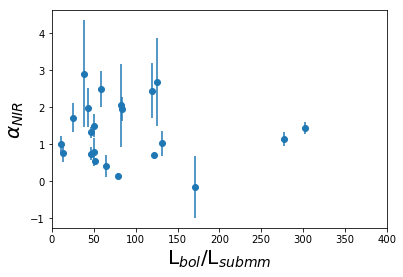

In [25]:
# Alpha NIR vs L_bol/L_submm
import numpy as np
selector = (np.array(alpha_nir_list) != -999)
plt.errorbar(np.array(l_bol_list)[selector]/np.array(lsubmm_list)[selector],
             np.array(alpha_nir_list)[selector], 
             yerr=np.array(alpha_nir_err_list)[selector],
             marker='o', linestyle='None')
ax = plt.axes()
ax.set_xlim([0,400])
ax.set_xlabel(r'L$_{bol}$/L$_{submm}$', fontsize=20)
ax.set_ylabel(r'$\alpha_{NIR}$', fontsize=20)

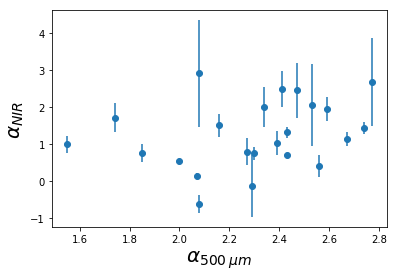

In [28]:
# Alpha NIR vs Alpha 500 um
import numpy as np
selector = (np.array(alpha_nir_list) != -999)
plt.errorbar(np.array(alpha500_list)[selector],
             np.array(alpha_nir_list)[selector], 
             yerr=np.array(alpha_nir_err_list)[selector],
             marker='o', linestyle='None')
ax = plt.axes()
ax.set_xlabel(r'$\alpha_{500\,\mu m}$', fontsize=20)
ax.set_ylabel(r'$\alpha_{NIR}$', fontsize=20)

## Line detection statistics

In [64]:
%matplotlib inline
import os
from astropy.io import ascii
import numpy as np

data = ascii.read(archive_dir+'CDF_archive_v2_lines.txt')
total_obj = list(set(data['Object']))
# print(set(data['Object']), len(list(set(data['Object']))))

print(total_obj, len(total_obj))

def DetectionInSource(species, data):
    
    # get the index of the line list for the given species
    selector = np.zeros_like(data['Line'], dtype=bool)
    for i in range(len(data['Line'])):
        if species in data['Line'][i]:
            selector[i] = True
            
    # if species == 'CO', check further to exclude 13CO
    if species == 'CO':
        for i in range(len(data['Line'])):
            if '13CO' in data['Line'][i]:
                selector[i] = False
    
    obj_detection = list(set(data['Object'][selector]))
    
    return obj_detection

species_list = ['CO', '13CO', 'HCO+', 'H2O', 'OI3P1-3P2', 'OI3P0-3P1', 'OI', 'CI','CII']
cutter = (data['SNR'] >= 5) & (data['Validity'] == 1) 
# positiver = (data['Str(W/cm2)'] >= 0)
for s in species_list:
    print(s, [obj for obj in total_obj if (obj not in DetectionInSource(s, data[cutter]))])

(['IRAS03245', 'IRAS03301', 'TMC1', 'L1455-IRS3', 'WL12', 'DKCha', 'L723-MM', 'L1014', 'TMC1A', 'HH100', 'L1157', 'Ced110', 'VLA1623', 'B335', 'HH46', 'IRAS15398', 'RCrA-IRS5A', 'RCrA-IRS7B', 'RCrA-IRS7C', 'RNO91', 'BHR71', 'GSS30-IRS1', 'L483', 'TMR1', 'B1-a', 'L1551-IRS5', 'B1-c'], 27)
('CO', ['L1014'])
('13CO', ['IRAS03245', 'IRAS03301', 'TMC1', 'L1455-IRS3', 'DKCha', 'L723-MM', 'L1014', 'TMC1A', 'L1157', 'B335', 'HH46', 'IRAS15398', 'RNO91', 'BHR71', 'L483', 'TMR1', 'B1-a', 'B1-c'])
('HCO+', ['IRAS03245', 'IRAS03301', 'TMC1', 'L1455-IRS3', 'WL12', 'DKCha', 'L723-MM', 'L1014', 'TMC1A', 'L1157', 'Ced110', 'VLA1623', 'B335', 'HH46', 'IRAS15398', 'RNO91', 'BHR71', 'L483', 'TMR1', 'B1-a', 'L1551-IRS5', 'B1-c'])
('H2O', ['Ced110', 'HH46', 'RNO91'])
('OI3P1-3P2', ['L1455-IRS3', 'L723-MM', 'HH100', 'Ced110', 'HH46', 'IRAS15398', 'RNO91', 'L483', 'B1-c'])
('OI3P0-3P1', ['IRAS03245', 'L1455-IRS3', 'WL12', 'L723-MM', 'L1014', 'TMC1A', 'HH100', 'L1157', 'Ced110', 'B335', 'HH46', 'IRAS15398', '

In [65]:
# only count lines with positive fluxes
species_list = ['CO', '13CO', 'HCO+', 'H2O', 'OI3P1-3P2', 'OI3P0-3P1', 'OI', 'CI','CII']
cutter = (data['SNR'] >= 5) & (data['Validity'] == 1) & (data['Str(W/cm2)'] >= 0)
for s in species_list:
    print(s, [obj for obj in total_obj if (obj not in DetectionInSource(s, data[cutter]))])

('CO', ['L1014'])
('13CO', ['IRAS03245', 'IRAS03301', 'TMC1', 'L1455-IRS3', 'DKCha', 'L723-MM', 'L1014', 'TMC1A', 'L1157', 'B335', 'HH46', 'IRAS15398', 'RNO91', 'BHR71', 'L483', 'TMR1', 'B1-a', 'B1-c'])
('HCO+', ['IRAS03245', 'IRAS03301', 'TMC1', 'L1455-IRS3', 'WL12', 'DKCha', 'L723-MM', 'L1014', 'TMC1A', 'L1157', 'Ced110', 'VLA1623', 'B335', 'HH46', 'IRAS15398', 'RNO91', 'BHR71', 'L483', 'TMR1', 'B1-a', 'L1551-IRS5', 'B1-c'])
('H2O', ['Ced110', 'HH46', 'RNO91'])
('OI3P1-3P2', ['L1455-IRS3', 'L723-MM', 'HH100', 'Ced110', 'HH46', 'IRAS15398', 'RNO91', 'L483', 'B1-c'])
('OI3P0-3P1', ['IRAS03245', 'L1455-IRS3', 'WL12', 'L723-MM', 'L1014', 'TMC1A', 'HH100', 'L1157', 'Ced110', 'B335', 'HH46', 'IRAS15398', 'RNO91', 'BHR71', 'L483', 'TMR1', 'B1-c'])
('OI', ['L1455-IRS3', 'L723-MM', 'HH100', 'Ced110', 'HH46', 'IRAS15398', 'RNO91', 'L483', 'B1-c'])
('CI', ['L1157', 'B335', 'BHR71'])
('CII', ['IRAS03245', 'L1455-IRS3', 'WL12', 'DKCha', 'L723-MM', 'TMC1A', 'HH100', 'L1157', 'Ced110', 'VLA1623', '

In [79]:
species_list = ['CO4-3','CO5-4','CO6-5','CO7-6','CO8-7','CO9-8','CO10-9','CO11-10','CO12-11','CO13-12','CO14-13']
for s in species_list:
    print(s, [obj for obj in total_obj if (obj not in DetectionInSource(s, data[cutter & ]))])

SyntaxError: invalid syntax (<ipython-input-79-cc2cac0f0281>, line 3)

In [61]:
species_list = ['13CO5-4','13CO6-5','13CO7-6','13CO8-7','13CO9-8','13CO10-9','13CO11-10',
                '13CO12-11','13CO13-12']
for s in species_list:
    print(s, [obj for obj in total_obj if (obj not in DetectionInSource(s, data[cutter]))])
    
print('Line found in the following sources')
for s in species_list:
    print(s, [obj for obj in total_obj if (obj in DetectionInSource(s, data[cutter]))])

('13CO5-4', ['IRAS03245', 'IRAS03301', 'TMC1', 'L1455-IRS3', 'DKCha', 'L723-MM', 'L1014', 'TMC1A', 'L1157', 'B335', 'HH46', 'IRAS15398', 'RNO91', 'BHR71', 'L483', 'TMR1', 'B1-a', 'B1-c'])
('13CO6-5', ['IRAS03245', 'IRAS03301', 'TMC1', 'L1455-IRS3', 'DKCha', 'L723-MM', 'L1014', 'TMC1A', 'L1157', 'B335', 'HH46', 'IRAS15398', 'RNO91', 'BHR71', 'L483', 'TMR1', 'B1-a', 'L1551-IRS5', 'B1-c'])
('13CO7-6', ['IRAS03245', 'IRAS03301', 'TMC1', 'L1455-IRS3', 'WL12', 'DKCha', 'L723-MM', 'L1014', 'TMC1A', 'L1157', 'Ced110', 'B335', 'HH46', 'IRAS15398', 'RNO91', 'BHR71', 'L483', 'TMR1', 'B1-a', 'L1551-IRS5', 'B1-c'])
('13CO8-7', ['IRAS03245', 'IRAS03301', 'TMC1', 'L1455-IRS3', 'WL12', 'DKCha', 'L723-MM', 'L1014', 'TMC1A', 'L1157', 'Ced110', 'B335', 'HH46', 'IRAS15398', 'RNO91', 'BHR71', 'L483', 'TMR1', 'B1-a', 'L1551-IRS5', 'B1-c'])
('13CO9-8', ['IRAS03245', 'IRAS03301', 'TMC1', 'L1455-IRS3', 'WL12', 'DKCha', 'L723-MM', 'L1014', 'TMC1A', 'L1157', 'Ced110', 'B335', 'HH46', 'IRAS15398', 'RNO91', 'BHR71

In [58]:
for s in species_list:
    print(s, [obj for obj in total_obj if (obj in DetectionInSource(s, data[cutter]))])

('13CO5-4', ['WL12', 'HH100', 'Ced110', 'VLA1623', 'RCrA-IRS5A', 'RCrA-IRS7B', 'RCrA-IRS7C', 'GSS30-IRS1', 'L1551-IRS5'])
('13CO6-5', ['WL12', 'HH100', 'Ced110', 'VLA1623', 'RCrA-IRS5A', 'RCrA-IRS7B', 'RCrA-IRS7C', 'GSS30-IRS1'])
('13CO7-6', ['HH100', 'VLA1623', 'RCrA-IRS5A', 'RCrA-IRS7B', 'RCrA-IRS7C', 'GSS30-IRS1'])
('13CO8-7', ['HH100', 'VLA1623', 'RCrA-IRS5A', 'RCrA-IRS7B', 'RCrA-IRS7C', 'GSS30-IRS1'])
('13CO9-8', ['HH100', 'VLA1623', 'RCrA-IRS5A', 'RCrA-IRS7B', 'RCrA-IRS7C', 'GSS30-IRS1'])
('13CO10-9', ['VLA1623', 'GSS30-IRS1'])
('13CO11-10', [])
('13CO12-11', [])
('13CO13-12', [])


In [67]:
# show sources with detections
species_list = ['HCO+6-5','HCO+7-6','HCO+8-7','HCO+9-8','HCO+10-9','HCO+11-10','HCO+12-11','HCO+13-12','HCO+14-13',
                'HCO+15-14','HCO+16-15']
cutter = (data['SNR'] >= 5) & (data['Validity'] == 1)
for s in species_list:
    print(s, [obj for obj in total_obj if (obj in DetectionInSource(s, data[cutter]))])

('HCO+6-5', ['HH100', 'RCrA-IRS7B', 'RCrA-IRS7C'])
('HCO+7-6', ['HH100', 'RCrA-IRS5A', 'RCrA-IRS7B', 'RCrA-IRS7C', 'GSS30-IRS1'])
('HCO+8-7', ['HH100', 'RCrA-IRS5A', 'RCrA-IRS7B', 'RCrA-IRS7C'])
('HCO+9-8', [])
('HCO+10-9', ['HH100'])
('HCO+11-10', [])
('HCO+12-11', [])
('HCO+13-12', [])
('HCO+14-13', [])
('HCO+15-14', [])
('HCO+16-15', [])


## detail water line detection stats

In [73]:
species_list =  ['H2O','p-H2O1_11-0_00','p-H2O2_11-2_02','o-H2O1_10-1_01','o-H2O3_12-2_21','o-H2O3_12-3_03','p-H2O2_02-1_11']
cutter = (data['SNR'] >= 5) & (data['Validity'] == 1)
for s in species_list:
    print(s, [obj for obj in total_obj if (obj in DetectionInSource(s, data[cutter]))])

('H2O', ['IRAS03245', 'IRAS03301', 'TMC1', 'L1455-IRS3', 'WL12', 'DKCha', 'L723-MM', 'L1014', 'TMC1A', 'HH100', 'L1157', 'VLA1623', 'B335', 'IRAS15398', 'RCrA-IRS5A', 'RCrA-IRS7B', 'RCrA-IRS7C', 'BHR71', 'GSS30-IRS1', 'L483', 'TMR1', 'B1-a', 'L1551-IRS5', 'B1-c'])
('p-H2O1_11-0_00', ['HH100', 'L1157', 'IRAS15398', 'RCrA-IRS5A', 'RCrA-IRS7B', 'RCrA-IRS7C', 'BHR71', 'GSS30-IRS1', 'L483', 'B1-a', 'B1-c'])
('p-H2O2_11-2_02', ['BHR71', 'B1-c'])
('o-H2O1_10-1_01', ['L1157', 'RCrA-IRS7B', 'RCrA-IRS7C', 'BHR71', 'B1-c'])
('o-H2O3_12-2_21', ['DKCha', 'HH100', 'L1157', 'VLA1623', 'RCrA-IRS7B', 'RCrA-IRS7C', 'BHR71', 'GSS30-IRS1', 'TMR1', 'B1-a', 'B1-c'])
('o-H2O3_12-3_03', ['L1157', 'BHR71', 'B1-c'])
('p-H2O2_02-1_11', ['DKCha', 'L723-MM', 'L1157', 'B335', 'IRAS15398', 'RCrA-IRS5A', 'RCrA-IRS7B', 'RCrA-IRS7C', 'BHR71', 'GSS30-IRS1', 'TMR1', 'B1-c'])


## Use SNR >= 3 cut

In [62]:
species_list = ['CO', '13CO', 'HCO+', 'H2O', 'OI3P1-3P2', 'OI3P0-3P1', 'OI', 'CI','CII']
cutter = (data['SNR'] >= 3) & (data['Validity'] == 1)
for s in species_list:
    print(s, [obj for obj in total_obj if (obj not in DetectionInSource(s, data[cutter]))])

('CO', [])
('13CO', ['L1157', 'L483', 'B1-c'])
('HCO+', ['IRAS03245', 'WL12', 'DKCha', 'VLA1623', 'BHR71', 'B1-a'])
('H2O', [])
('OI3P1-3P2', ['L1455-IRS3', 'L723-MM', 'HH100', 'Ced110', 'HH46', 'IRAS15398', 'RNO91', 'L483', 'B1-c'])
('OI3P0-3P1', ['L1455-IRS3', 'L723-MM', 'L1014', 'HH100', 'Ced110', 'HH46', 'IRAS15398', 'RNO91', 'L483', 'TMR1', 'B1-c'])
('OI', ['L1455-IRS3', 'L723-MM', 'HH100', 'Ced110', 'HH46', 'IRAS15398', 'RNO91', 'L483', 'B1-c'])
('CI', [])
('CII', ['IRAS03245', 'L1455-IRS3', 'L723-MM', 'HH100', 'L1157', 'Ced110', 'HH46', 'IRAS15398', 'RNO91', 'L483', 'TMR1'])


In [ ]:
           NII_205
   

## Number of lines found in 1D SPIRE spectra

In [75]:
selector = (data['ObsWL(um)'] >= 200) & (data['Pixel_No.'] == 'c') & (data['SNR'] >= 5) & (data['Validity'] == 1)
print(len(data[selector]))
print(len(list(set(data['Object'][selector]))))

323
25


## Number of lines found in SPIRE cube spectra

In [76]:
selector = (data['ObsWL(um)'] >= 200) & (data['Pixel_No.'] != 'c') & (data['SNR'] >= 5) & (data['Validity'] == 1)
print(len(data[selector]))
print(len(list(set(data['Object'][selector]))))

3068
27
